In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/home/zebraking/Downloads/MlProjects/Birthrate-Analysis-master/births.csv')

In [3]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
df.info()
df['day'].fillna(0,inplace=True)
df['day']=df['day'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [5]:
df['decade']=10 * df['year']//10

In [6]:
df.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1969
1,1969,1,1,M,4440,1969
2,1969,1,2,F,4454,1969
3,1969,1,2,M,4548,1969
4,1969,1,3,F,4548,1969


In [7]:
#df.pivot_table('births',index='decade',columns='gender',aggfunc='sum')


In [8]:
# to visualize the gender birth rate

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

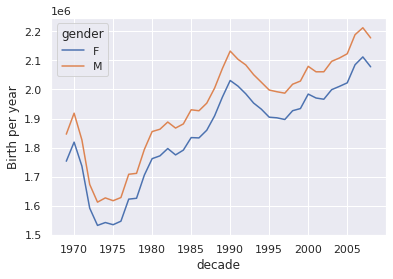

In [10]:
sns.set()
birth_decade=df.pivot_table('births',index='decade',columns='gender',aggfunc='sum')
birth_decade.plot()
plt.ylabel('Birth per year')
plt.show()

In [11]:
quartiles=np.percentile(df['births'],[25,50,75])

In [12]:
quartiles

array([4358. , 4814. , 5289.5])

In [14]:
mean=quartiles[1]

4814.0

In [16]:
sigma=0.74 *( quartiles[2] - quartiles[0])

In [18]:
sigma,mean

(689.31, 4814.0)

In [19]:
births=df.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')

In [20]:
births

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1969
1,1969,1,1,M,4440,1969
2,1969,1,2,F,4454,1969
3,1969,1,2,M,4548,1969
4,1969,1,3,F,4548,1969
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1988
15063,1988,12,30,F,5742,1988
15064,1988,12,30,M,6095,1988
15065,1988,12,31,F,4435,1988


In [21]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day,
                              format='%Y%m%d')

In [22]:
births

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1969
1969-01-01,1969,1,1,M,4440,1969
1969-01-02,1969,1,2,F,4454,1969
1969-01-02,1969,1,2,M,4548,1969
1969-01-03,1969,1,3,F,4548,1969
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1988
1988-12-30,1988,12,30,F,5742,1988
1988-12-30,1988,12,30,M,6095,1988
1988-12-31,1988,12,31,F,4435,1988


In [23]:
births['day of week']=births.index.dayofweek

/home/zebraking/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
births

,year,month,day,gender,births,decade,day of week
1969-01-01,1969,1,1,F,4046,1969,2
1969-01-01,1969,1,1,M,4440,1969,2
1969-01-02,1969,1,2,F,4454,1969,3
1969-01-02,1969,1,2,M,4548,1969,3
1969-01-03,1969,1,3,F,4548,1969,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1988,3
1988-12-30,1988,12,30,F,5742,1988,4
1988-12-30,1988,12,30,M,6095,1988,4
1988-12-31,1988,12,31,F,4435,1988,5


In [26]:
births_day=births.pivot_table('births',index='day of week',columns='decade',aggfunc='mean')

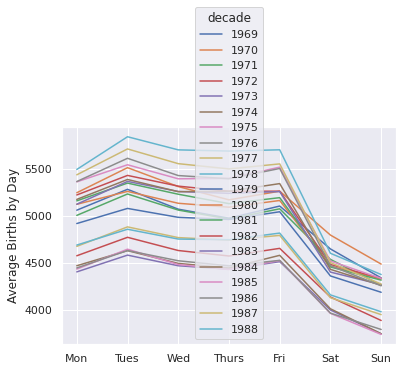

In [27]:
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()

In [28]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


/home/zebraking/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


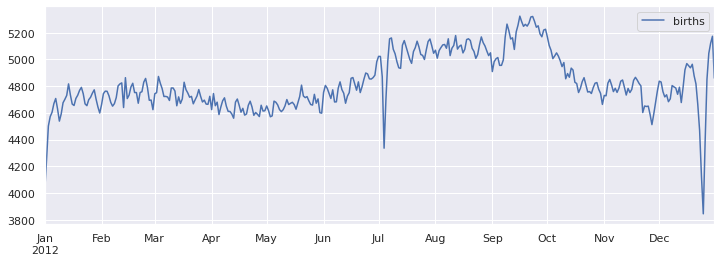

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()